# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
## 2. Load data
- `clean_data_after_eda.csv` is the cleaned version of `client_data.csv`

In [2]:
df = pd.read_csv('data/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('data/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get January and December prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
# diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,price_date,dec_1,dec_2,price_off_peak_var,price_off_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931,-0.003994,-0.000001


In [8]:
# Add percentage difference in energy/power between December and January
diff['offpeak_diff_dec_january_energy_percent'] = (diff['dec_1'] - diff['price_off_peak_var'])/diff['price_off_peak_var'] * 100
diff['offpeak_diff_dec_january_power_percent'] = (diff['dec_2'] - diff['price_off_peak_fix'])/diff['price_off_peak_fix'] * 100
diff.head()

,id,price_date,dec_1,dec_2,price_off_peak_var,price_off_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,offpeak_diff_dec_january_energy_percent,offpeak_diff_dec_january_power_percent
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969,-0.006192,0.162916,-4.910466,0.401607
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931,-0.004104,0.177779,-2.772093,0.401606
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710,0.050443,1.500000,33.442060,3.374980
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969,-0.010018,0.162916,-8.139025,0.401607
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931,-0.003994,-0.000001,-2.672752,-0.000003


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as you can!

### Counts of unique values

In [9]:
# Counts of unique values
display(df.nunique())
display(price_df.nunique())

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

### 'MISSING' values
- `channel_sales` and `origin_up` in `client_df` have 'MISSING' values, so they may not provide accurate predictions with them and could be removed to avoid confusion. Alternatively, could remove rows with `channel_sales == 'MISSING'` or `origin_up == 'MISSING'`

In [10]:
for column in df.columns:
    has_missing = 'MISSING' in df[column].values
    print(column + " has MISSING: " + str(has_missing))
    if has_missing:
        count = (df[column] == 'MISSING').sum()
        print(f"--> {count} rows have 'MISSING' in {column}")
# df[~(df == 'MISSING').any(axis=1)]

id has MISSING: False
channel_sales has MISSING: True
--> 3725 rows have 'MISSING' in channel_sales
cons_12m has MISSING: False
cons_gas_12m has MISSING: False
cons_last_month has MISSING: False
date_activ has MISSING: False
date_end has MISSING: False
date_modif_prod has MISSING: False
date_renewal has MISSING: False
forecast_cons_12m has MISSING: False
forecast_cons_year has MISSING: False
forecast_discount_energy has MISSING: False
forecast_meter_rent_12m has MISSING: False
forecast_price_energy_off_peak has MISSING: False
forecast_price_energy_peak has MISSING: False
forecast_price_pow_off_peak has MISSING: False
has_gas has MISSING: False
imp_cons has MISSING: False
margin_gross_pow_ele has MISSING: False
margin_net_pow_ele has MISSING: False
nb_prod_act has MISSING: False
net_margin has MISSING: False
num_years_antig has MISSING: False
origin_up has MISSING: True
--> 64 rows have 'MISSING' in origin_up
pow_max has MISSING: False
var_year_price_off_peak_var has MISSING: False
var_

### `date_activ`, `date_end`, `date_modif_prod`, `date_renewal`
- Could obtain time client has stayed with service with number of days between `date_activ` and `date_end`.
- Extract month and/or year of activation for `date_activ`, `date_renewal`, `date_end`.
    - There are cases where `month_activ != month_end` and `month_activ != month_renewal`.
    - Can drop ones for `modif_prod`, due to being difficult to justify for ending service.
- Raw dates cannot be used in ML, remove them later.

In [11]:
df["days_of_use"] = (df["date_end"] - df["date_activ"]).dt.days
for i in ["activ", "end", "modif_prod", "renewal"]:
    df[f"month_{i}"] = df[f"date_{i}"].dt.month
    df[f"year_{i}"] = df[f"date_{i}"].dt.year
    
display(df.head())
print((df['month_activ'] != df['month_end']).any())
print((df['month_activ'] != df['month_renewal']).any())

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,days_of_use,month_activ,year_activ,month_end,year_end,month_modif_prod,year_modif_prod,month_renewal,year_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,1096,6,2013,6,2016,11,2015,6,2015
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,2566,8,2009,8,2016,8,2009,8,2015
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,2192,4,2010,4,2016,4,2010,4,2015
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,2192,3,2010,3,2016,3,2010,3,2015
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,2245,1,2010,3,2016,1,2010,3,2015


True
True


### `forecast_cons_12m` vs `forecast_cons_year`
- `forecast_cons_12m` and `forecast_cons_year` are very similar in terms of property and distribution, but the former provides a significantly less skewed distribution.
- Could drop `forecast_cons_year` due to redundancy.

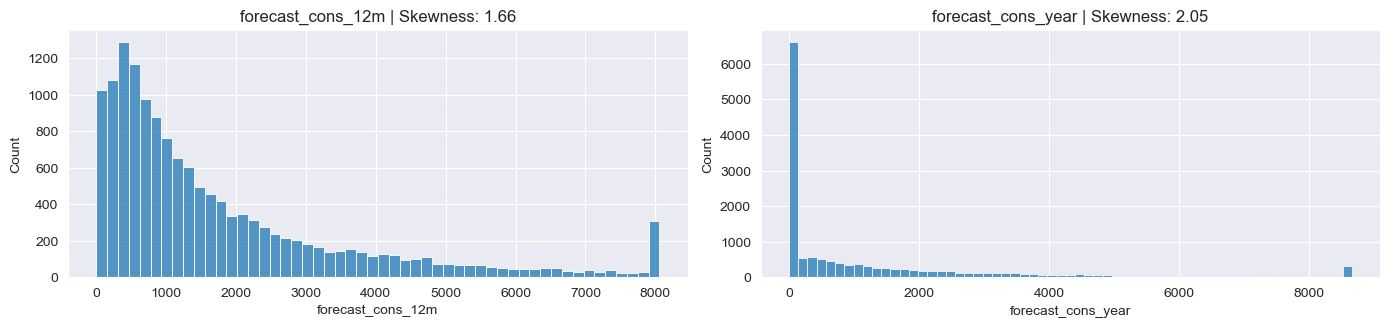

In [12]:
forecast_columns_client = ["forecast_cons_12m", "forecast_cons_year",]

sns.set_style("darkgrid")
plt.figure(figsize=(14, len(forecast_columns_client) * 3))
for idx, feature in enumerate(forecast_columns_client, 1):
    plt.subplot(len(forecast_columns_client), 2, idx)

    lower = df[feature].quantile(0.02)
    upper = df[feature].quantile(0.98)
    data = df[feature].clip(lower, upper)
    
    sns.histplot(data, kde=False)
    plt.title(f"{feature} | Skewness: {round(data.skew(), 2)}")

plt.tight_layout()
plt.show()

### `operating_expenses`
- `margin_gross_pow_ele` and `margin_net_pow_ele` can be used to calculate `operating_expenses`
    - https://www.investopedia.com/ask/answers/021215/what-difference-between-gross-profit-margin-and-net-profit-margin.asp#:~:text=Gross%20profit%20margin%20is%20the,and%20operating%20expenses%20from%20revenue.
- There are only 2 rows where `df['operating_expenses'] != 0`, could be argued that `margin_gross_pow_ele` and `margin_net_pow_ele` are too similar to be used and thus the former can be removed, as the latter is considered a more definitive profitability metric.

In [13]:
df['operating_expenses'] = df['margin_gross_pow_ele'] - df['margin_net_pow_ele']
display(df[['margin_gross_pow_ele', 'margin_net_pow_ele', 'operating_expenses', 'net_margin']])
df[df['operating_expenses'] != 0][['margin_gross_pow_ele', 'margin_net_pow_ele', 'operating_expenses', 'net_margin']]

,margin_gross_pow_ele,margin_net_pow_ele,operating_expenses,net_margin
0,25.44,25.44,0.0,678.99
1,16.38,16.38,0.0,18.89
2,28.60,28.60,0.0,6.60
3,30.22,30.22,0.0,25.46
4,44.91,44.91,0.0,47.98
...,...,...,...,...
14601,27.88,27.88,0.0,381.77
14602,0.00,0.00,0.0,90.34
14603,39.84,39.84,0.0,20.38
14604,13.08,13.08,0.0,0.96


,margin_gross_pow_ele,margin_net_pow_ele,operating_expenses,net_margin
4876,64.28,57.59,6.69,3215.03
10756,40.88,9.54,31.34,61.37


### `price_date`
- Since `price_date` values given are all involving first day of each month within 2015, could be replaced with ordinal attribute based on month.

In [14]:
print("Categories in price_date: " + str(price_df["price_date"].unique()))
price_df["month"] = price_df["price_date"].dt.month
price_df.head()

Categories in price_date: <DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00', '2015-11-01 00:00:00', '2015-12-01 00:00:00']
Length: 12, dtype: datetime64[ns]


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,4
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,5


### `has_gas`
- `has_gas` is boolean, should be converted to binary.

In [15]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

/var/folders/sp/136d3tf94ns_hpp_7z4mgphm0000gp/T/ipykernel_67377/3416244719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])


,churn
has_gas,
0,0.100544
1,0.081856


## Final Setup
- Can still potentially use these in analysis.

In [16]:
drop_features_client = ['dec_1', 'dec_2', 'month_modif_prod', 'year_modif_prod', 'channel_sales', 'origin_up', 'forecast_cons_year', 'margin_gross_pow_ele', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',]
df = df.drop(columns=[col for col in drop_features_client if col in df.columns])
df.to_csv("data/client_df_task3.csv", index=False)

drop_features_price = ['price_date',]
price_df = price_df.drop(columns=[col for col in drop_features_price if col in price_df.columns])
price_df.to_csv("data/price_df_task3.csv", index=False)

print("===== DATA SAVED =====")

===== DATA SAVED =====
